# Import packages

In [66]:
# !pip install -r multiff_analysis/requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))

from data_wrangling import general_utils, specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from non_behavioral_analysis.neural_data_analysis.model_neural_data.cca_methods import cca_class, cca_utils, cca_plotting, cca_lag_vs_no_lag_plotting, cca_cv_utils, cca_cv_plotting
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils
from non_behavioral_analysis.neural_data_analysis.decode_targets import behav_features_to_keep, decode_target_class, decode_target_utils
from non_behavioral_analysis.neural_data_analysis.gpfa_methods import elephant_utils, fit_gpfa_utils, gpfa_regression_utils, plot_gpfa_utils, gpfa_tuning, gpfa_helper_class

import sys
import math
import gc
import subprocess
from pathlib import Path

# Third-party imports
import numpy as np
from numpy import var
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi
import cProfile
import pstats

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

# To fit gpfa
import numpy as np
from importlib import reload
from scipy.integrate import odeint
import quantities as pq
import neo
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa import GPFA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from elephant.gpfa import gpfa_core, gpfa_util




plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

In [2]:
#raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"
dec = decode_target_class.DecodeTargetClass(raw_data_folder_path=raw_data_folder_path,
                                                               bin_width=0.02, window_width=0.05)

In [3]:
# dec.get_x_and_y_var(exists_ok=True)
# dec.reduce_y_var_lags(exists_ok=True)

In [4]:
exists_ok = True
dec.streamline_making_behav_and_neural_data(exists_ok=exists_ok)
dec.get_x_and_y_var(exists_ok=exists_ok)
dec.reduce_y_var_lags(exists_ok=exists_ok)
# dec._free_up_memory()

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Retrieved target_df
Loaded behav_data_all from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/behav_data_all.csv
Loaded single_vis_target_df from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/single_vis_target_df.csv
8697 rows of 38676 rows (22.5%) of behav_data_all are preserved after taking out chunks between target last-seen time and capture time
0 segments (0.0%) out of 781 segments have 0 duration. They are dropped from pursuit data

No NA values found in pursuit_data
Window width changed from 0.05 to 0.06 to make it odd
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0328/binned_spikes_df.csv
Loaded x_var from all_monkey_data/decoding_targets/monkey_Bruno/d

In [5]:
dec.x_var_lags.shape

(33125, 243)

In [6]:
dec.y_var_lags.shape

(33125, 673)

# GPFA

## get data for GPFA

In [7]:
dec.prepare_spikes_for_gpfa(align_at_beginning=False)

print(len(dec.spiketrains))
print(len(dec.spiketrains[0]))
print(len(dec.spiketrains[0][2]))

175
15
1


## fit gpfa

In [8]:
# # manually save the trajectories (this will be done in class henceforward)

# alignment = 'segStart' if dec.align_at_beginning else 'segEnd'
# file_name = f'gpfa_neural_aligned_{alignment}_d{10}.pkl'

# trajectories_path = os.path.join(
#             dec.decoding_targets_folder_path, file_name)

# with open(trajectories_path, 'wb') as f:
#     pickle.dump(dec.trajectories, f)
# print(f'Saved GPFA trajectories to {trajectories_path}')

In [9]:
dec.get_gpfa_traj(latent_dimensionality=10)


Loaded GPFA trajectories from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/gpfa_neural_aligned_segEnd_d10.pkl


In [10]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

## plot latent dimensions

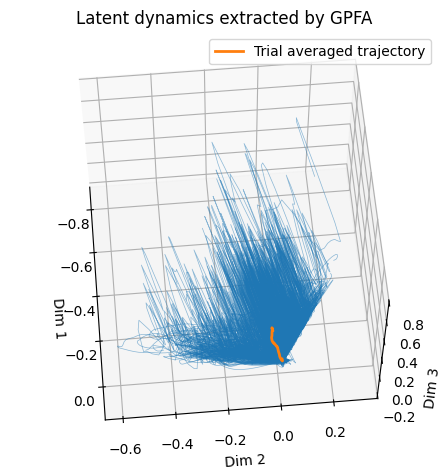

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: title={'center': 'Latent dynamics extracted by GPFA'}, xlabel='Dim 1', ylabel='Dim 2', zlabel='Dim 3'>)

In [37]:
plot_gpfa_utils.plot_gpfa_traj_3d_uniform_color(dec.trajectories)


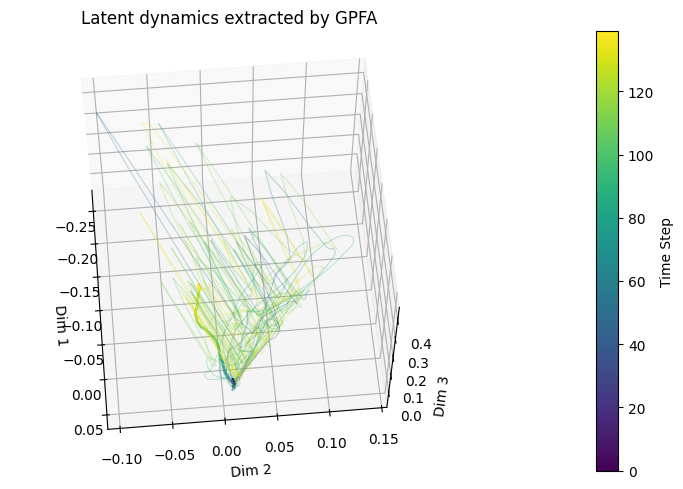

In [26]:
# First, enable interactive mode in your notebook
%matplotlib inline

# Import required modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create the interactive plot
fig, ax = plot_gpfa_utils.plot_gpfa_traj_3d(
    trajectories=dec.trajectories,
    figsize=(15, 5),
    linewidth_single_trial=0.75,
    alpha_single_trial=0.3,
    linewidth_trial_average=2,
    title='Latent dynamics extracted by GPFA',
    view_azim=-5,
    view_elev=60
)

plt.show()

In [ ]:
# fig = plot_gpfa_utils.plot_gpfa_traj_3d_plotly(trajectories)

In [27]:
# Find variance explained by each latent dimension
traj_stack = np.stack(dec.trajectories, axis=0)  # shape: (n_trials, 3, T)
var_by_dim = var(traj_stack, axis=(0, 2))    # variance across trials and time
var_by_dim /= var_by_dim.sum()               # normalize to get explained variance ratio
print("Variance explained by each latent dimension:", var_by_dim)


Variance explained by each latent dimension: [0.38133 0.28006 0.12792 0.06138 0.0622  0.03551 0.02254 0.0138  0.00877
 0.00649]


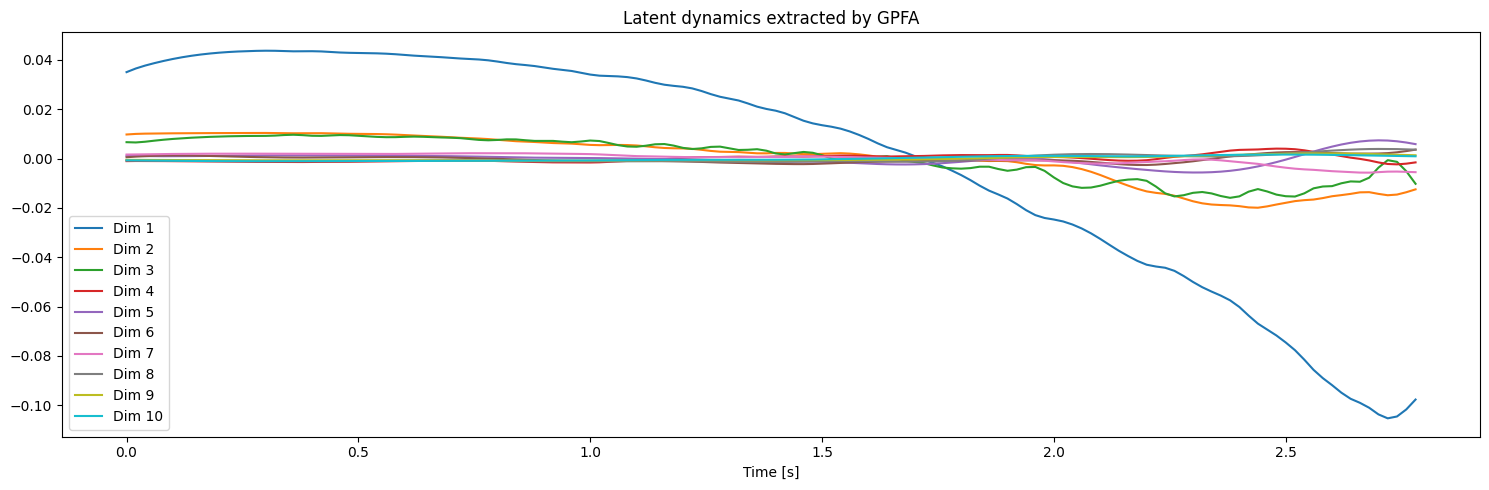

In [38]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Latent dynamics extracted by GPFA')
ax.set_xlabel('Time [s]')

average_trajectory = np.mean(dec.trajectories, axis=0)
time = np.arange(len(average_trajectory[0])) * 0.02  # assuming all trajectories have the same length

for i, x in enumerate(average_trajectory):
    ax.plot(time, x, label=f'Dim {i+1}')

ax.legend()

plt.tight_layout()
plt.show()


## to try

In [ ]:
import non_behavioral_analysis.neural_data_analysis.gpfa_methods.gpfa_regression_utils as gpfa_regression_utils

# 1. Print number of trials per timepoint
gpfa_regression_utils.print_trials_per_timepoint(dec.gpfa_neural_trials)

# 2. Check for NaNs
gpfa_regression_utils.check_for_nans_in_trials(dec.gpfa_neural_trials, name='latent')
gpfa_regression_utils.check_for_nans_in_trials(dec.behav_trials, name='behavioral')

# 3. Standardize trials
latent_trials_std = gpfa_regression_utils.standardize_trials(dec.gpfa_neural_trials)
behav_trials_std = gpfa_regression_utils.standardize_trials(dec.behav_trials)

# 4. Plot latent and behavioral variables for a few trials
gpfa_regression_utils.plot_latents_and_behav_trials(latent_trials_std, behav_trials_std, n_trials=5)


Computing GPFA trajectories with 3 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to all_monkey_data/decoding_targets/monkey_Bruno/data_0328/gpfa_neural_aligned_segEnd_d3.pkl


Timepoints: 100%|██████████| 75/75 [00:19<00:00,  3.94it/s]


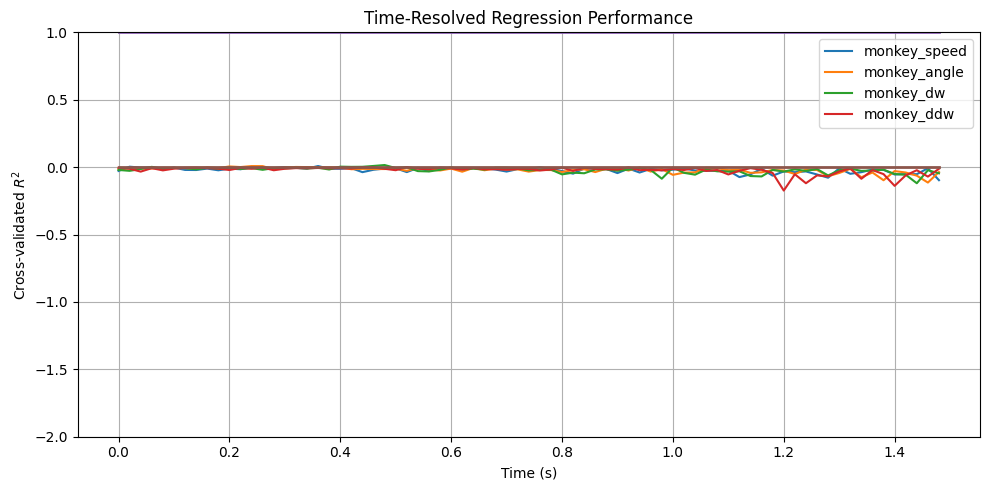

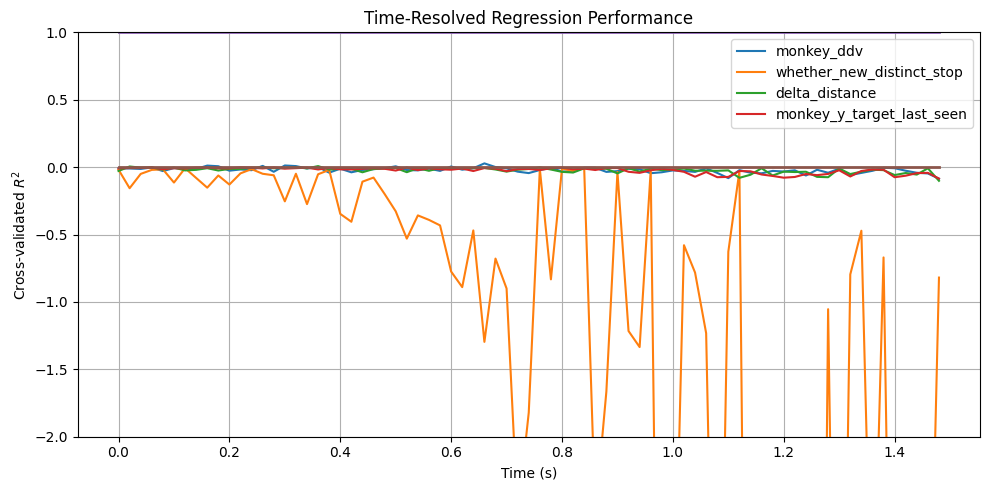

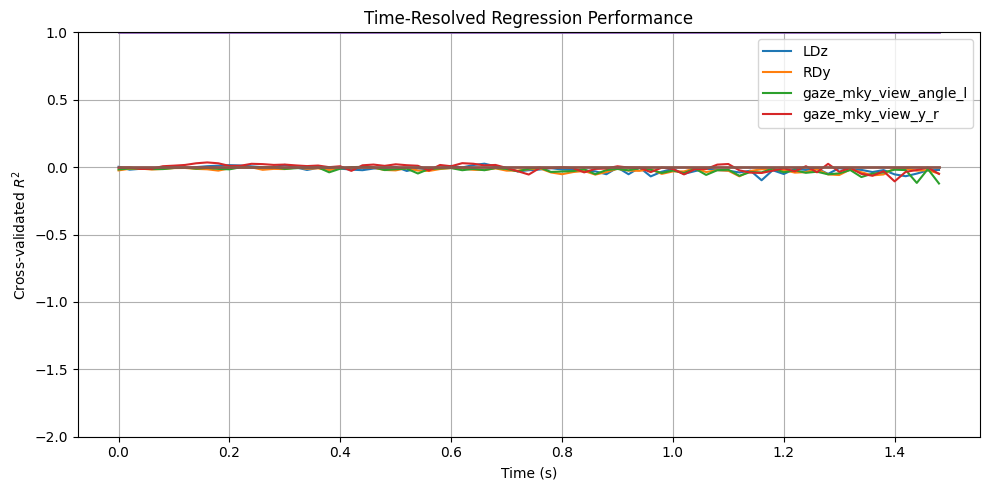

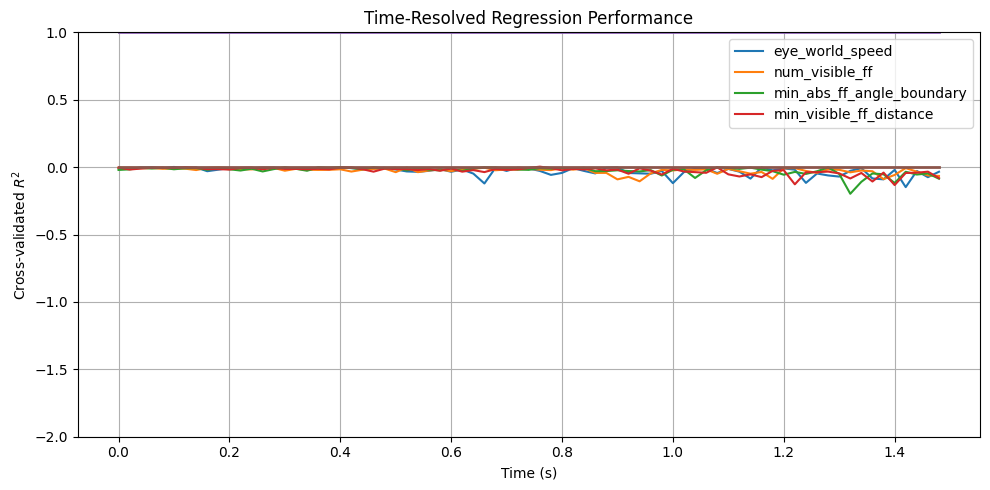

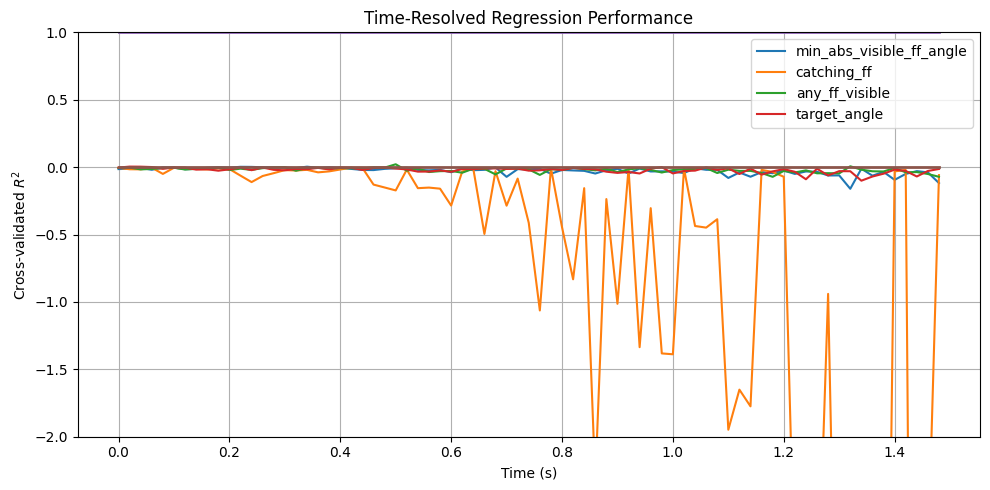

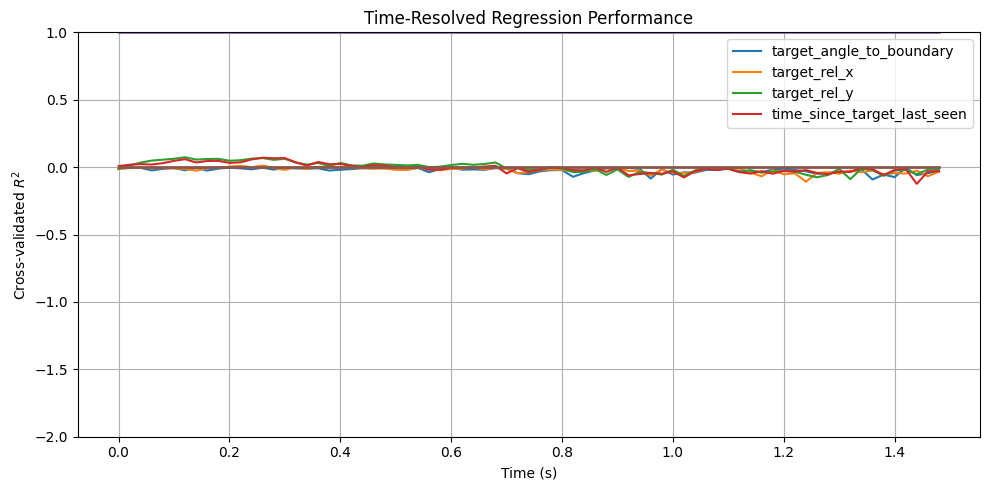

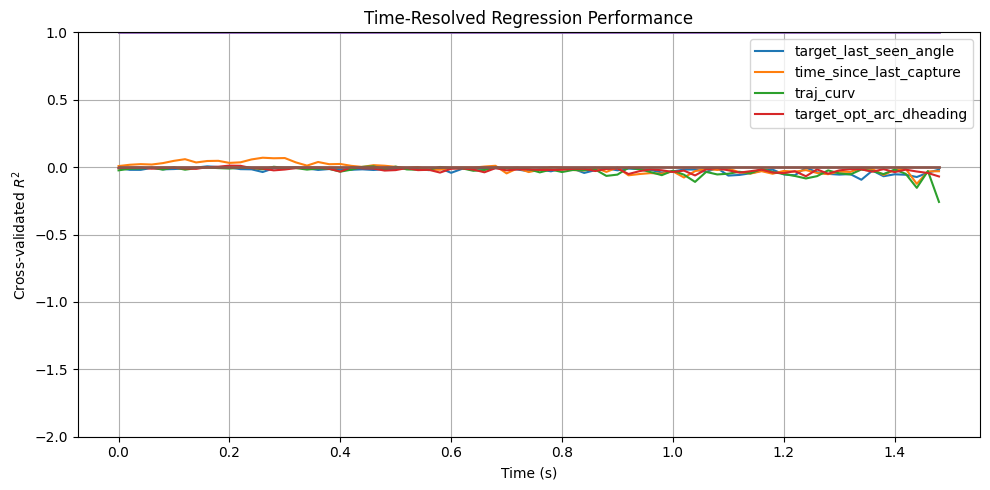

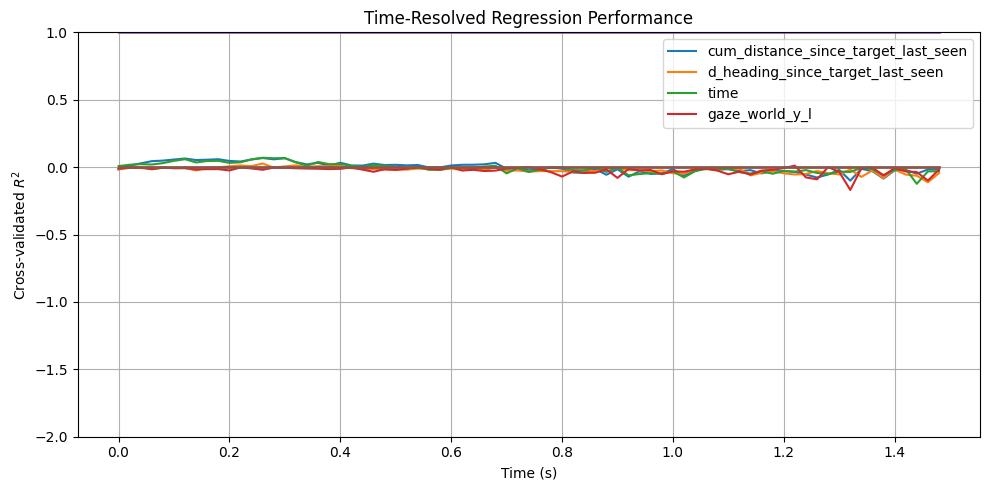

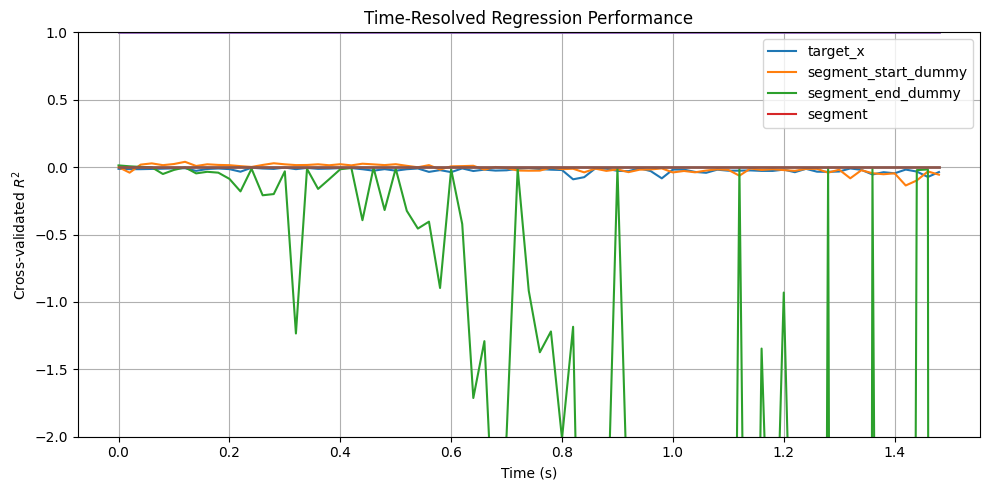

Computing GPFA trajectories with 5 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to all_monkey_data/decoding_targets/monkey_Bruno/data_0328/gpfa_neural_aligned_segEnd_d5.pkl


Timepoints: 100%|██████████| 75/75 [00:05<00:00, 12.64it/s]


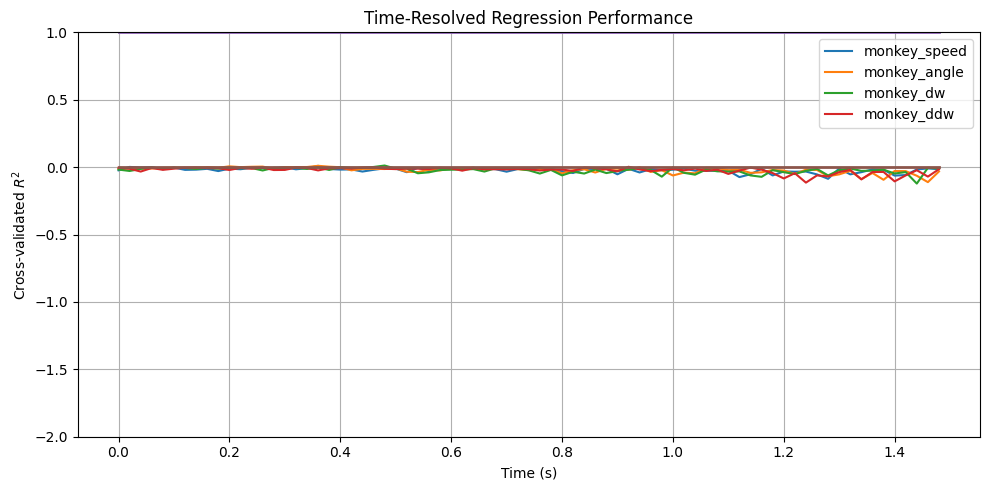

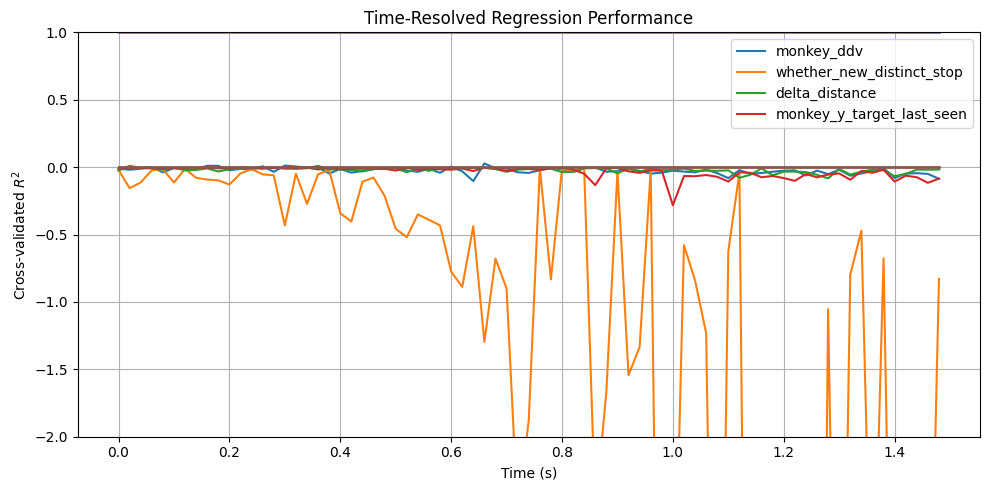

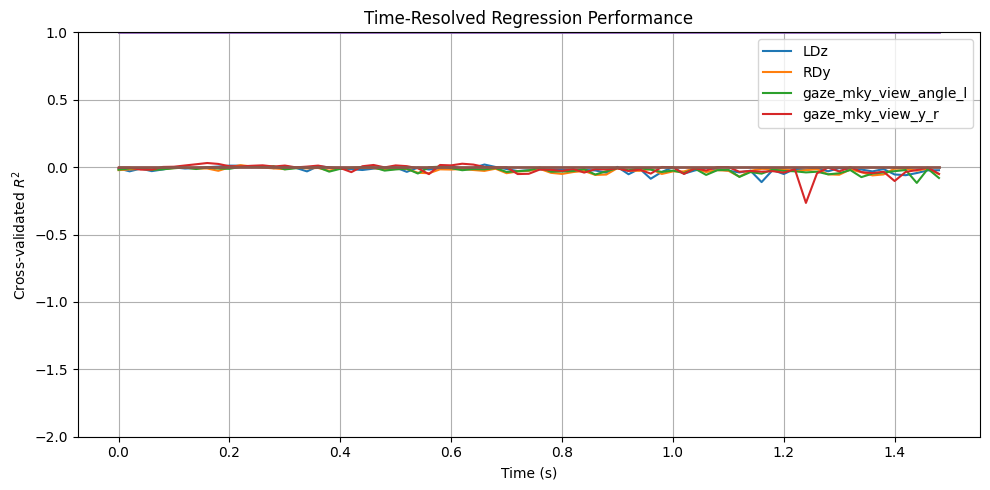

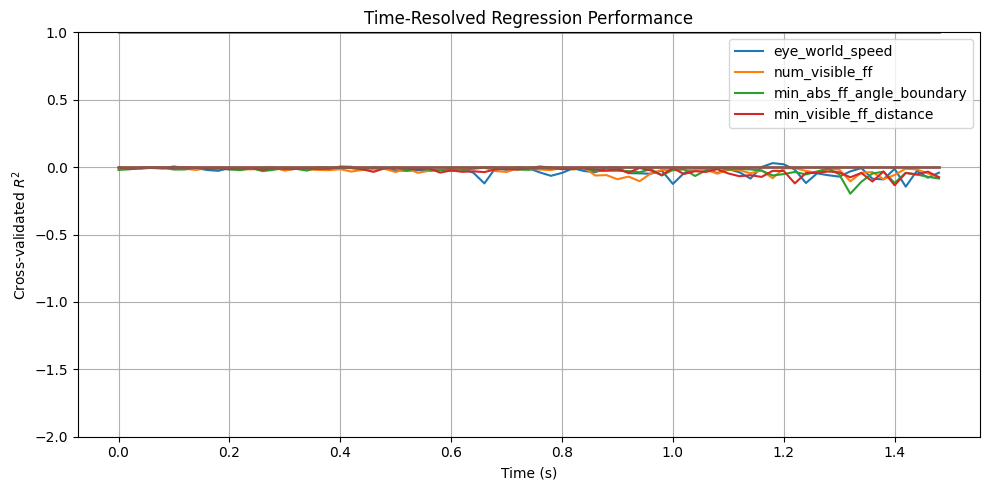

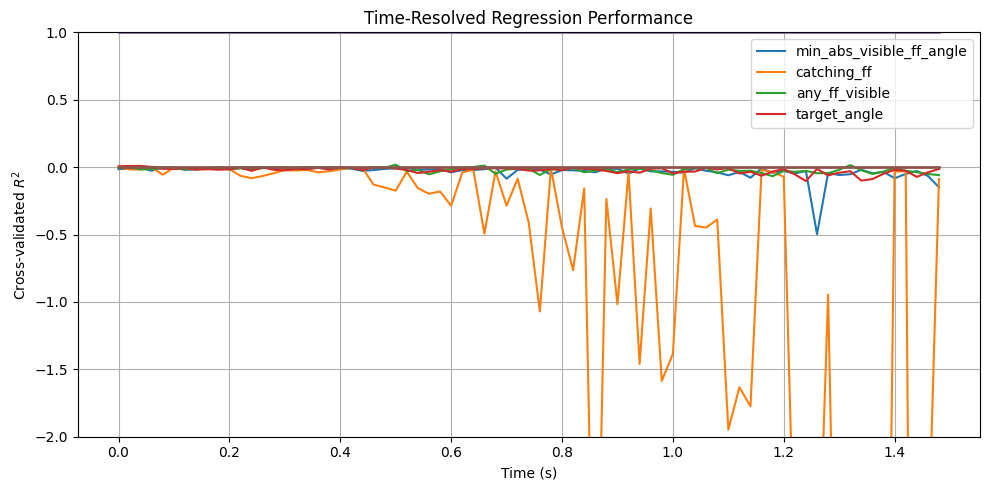

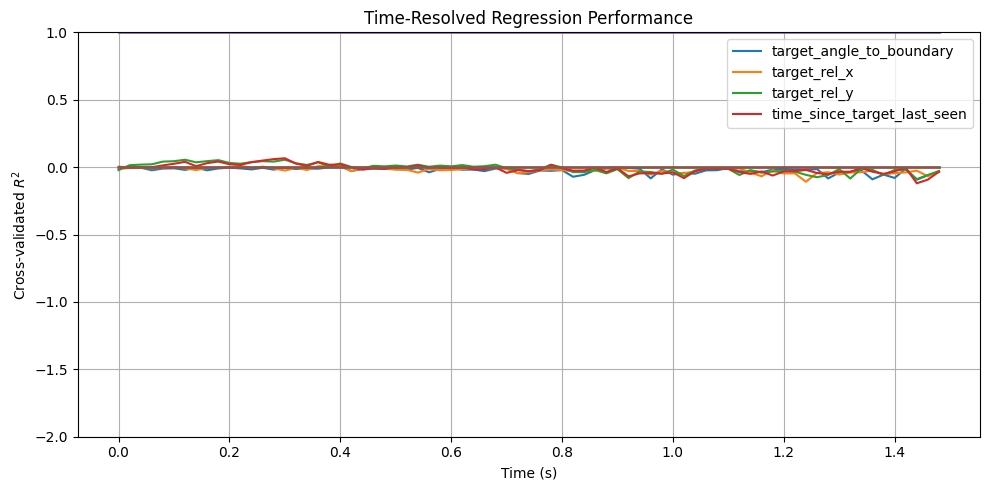

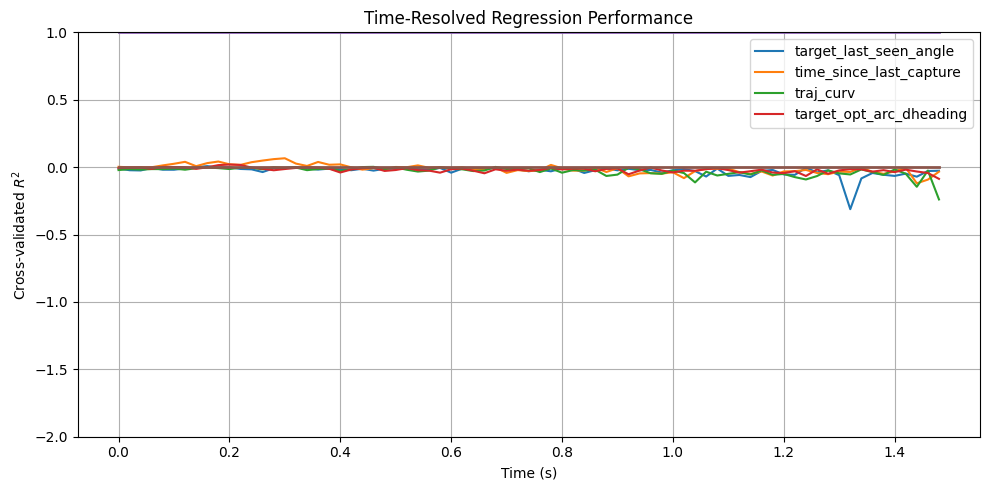

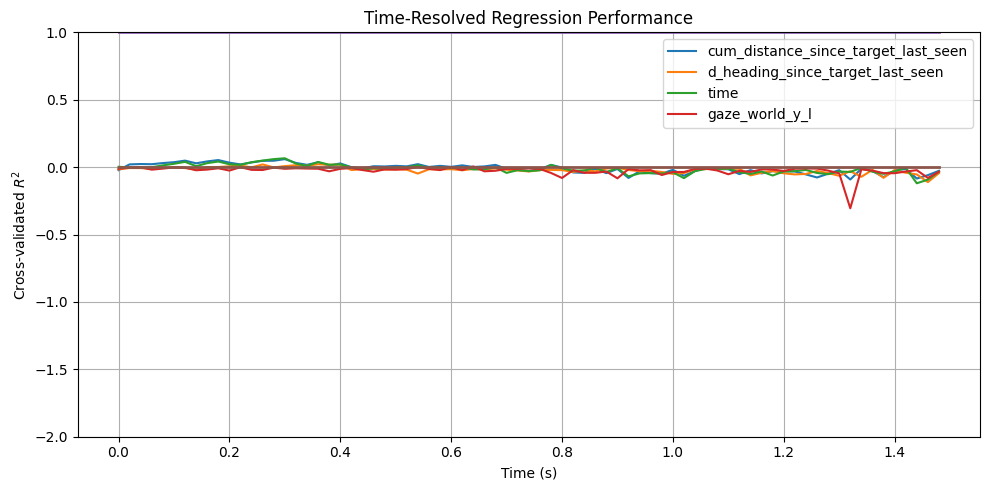

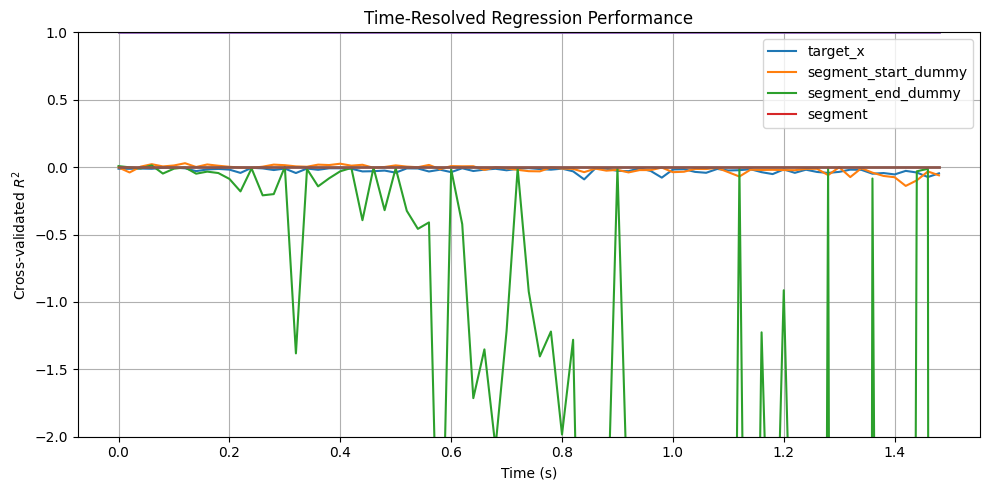

Computing GPFA trajectories with 10 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...


KeyboardInterrupt: 

In [65]:
# 5. Try multiple latent dimensionalities and plot R²
results = gpfa_regression_utils.try_multiple_latent_dims_and_plot(dec, behav_trials_std, dims=[3,5,10,15], time_step=0.02, cv_folds=5, max_timepoints=75)

### grid

In [ ]:
max_timepoints = int(1.5/0.02)
scores_by_time, times = gpfa_regression_utils.run_time_resolved_regression_variable_length_trials(dec.gpfa_neural_trials, dec.behav_trials, time_step=0.02, cv_folds=5, max_timepoints=max_timepoints,
                                                                                                  align_at_beginning=dec.align_at_beginning)

In [ ]:
scores_by_time_df = pd.DataFrame(scores_by_time, columns=dec.gpfa_behav_data_columns)

# check one dummy variable
if 'whether_new_distinct_stop' in dec.gpfa_behav_data_columns:
    # see the percentage of 1 of this dummy variable
    dec.gpfa_behav_data[['whether_new_distinct_stop']].sum()/len(dec.gpfa_behav_data)

In [70]:
import itertools
from joblib import Parallel, delayed

# How many parallel jobs?
from joblib import cpu_count
print(f"Detected CPU cores: {cpu_count()}")


Detected CPU cores: 8


In [71]:
# Define your grid
smoothing_windows = [1, 3]
use_sqrt = [True, False]
gpfa_dims = [3, 5]
bin_widths = [0.02]
ridge_alphas = [0.1, 1]
regression_types = ['ridge']
align_at_beginning_opts = [True]
pca_components = [5, 10]

param_grid_gpfa = list(itertools.product(
    smoothing_windows, use_sqrt, gpfa_dims, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))

# Baseline configs
param_grid_raw = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts
))
param_grid_pca = list(itertools.product(
    smoothing_windows, use_sqrt, bin_widths, ridge_alphas, regression_types, align_at_beginning_opts, pca_components
))

# Run GPFA grid
results_gpfa = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline=None
    )
    for (smoothing, sqrt, gpfa_dim, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_gpfa
)

# Run raw baseline grid
results_raw = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='raw'
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning) in param_grid_raw
)

# Run PCA baseline grid
results_pca = Parallel(n_jobs=-1, verbose=10)(
    delayed(gpfa_tuning.run_gpfa_experiment_time_resolved)(
        dec, smoothing, sqrt, None, bin_width, ridge_alpha, regression_type, align_at_beginning, baseline='pca', pca_components=pca_comp
    )
    for (smoothing, sqrt, bin_width, ridge_alpha, regression_type, align_at_beginning, pca_comp) in param_grid_pca
)

# Combine all results
all_results = results_gpfa + results_raw + results_pca
df = pd.DataFrame(all_results)
print(df.sort_values('mean_r2', ascending=False).head(10))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/gpfa_methods/gpfa_tuning.py:65: RuntimeWarning: invalid value encountered in sqrt
  neural_trials = [np.sqrt(trial) for trial in neural_trials]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.

Computing GPFA trajectories with 3 dimensions...


python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/ut

Computing GPFA trajectories with 3 dimensions...


klearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: Runti

Computing GPFA trajectories with 5 dimensions...


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/gpfa_methods/gpfa_tuning.py:65: RuntimeWarning: invalid value encountered in sqrt
  neural_trials = [np.sqrt(trial) for trial in neural_trials]
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/miniconda3/envs/ff_venv2/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean 

Computing GPFA trajectories with 5 dimensions...
Initializing parameters using factor analysis...


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
best = df.iloc[df['mean_r2'].idxmax()]
plt.plot(best['times'], np.nanmean(np.array(best['r2_by_time']), axis=1))
plt.xlabel('Time (s)')
plt.ylabel('Mean R²')
plt.title(f"Best config: {best['model']} R² by time")
plt.show()

# Compare models
import seaborn as sns
sns.catplot(data=df, x='model', y='mean_r2', kind='bar')

### plot

In [64]:
result.keys()

NameError: name 'result' is not defined

## to try as baseline

In [81]:
dec.gpfa_behav_data.shape

(33125, 36)

In [82]:
dec.x_var.shape

(33125, 22)

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Concatenate all trials (for both neural and behavior)
X = np.vstack([trial for trial in dec.gpfa_neural_trials])  # shape: (total_timepoints, n_neurons)
Y = np.vstack([trial for trial in dec.behav_trials]) # shape: (total_timepoints, n_behaviors)

# Standardize
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
Y_std = StandardScaler().fit_transform(Y)

# PCA
n_components = 10
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Regression (RidgeCV)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RidgeCV(alphas=np.logspace(-6, 6, 13))
r2s = []
for i in range(Y_std.shape[1]):
    print(f"Behavior {i}:")
    scores = cross_val_score(model, X_pca, Y_std[:, i], cv=kf, scoring='r2')
    r2s.append(scores.mean())
print(f"PCA+RidgeCV mean R2 per behavior: {np.round(r2s, 3)}")
print(f"PCA+RidgeCV mean R2 (average over behaviors): {np.mean(r2s):.3f}")

PCA+RidgeCV mean R2 per behavior: [-0.002 -0.    -0.    -0.001  0.002 -0.012 -0.002 -0.001  0.002 -0.001
 -0.    -0.007  0.     0.001  0.001 -0.001 -0.019 -0.     0.    -0.001
 -0.001  0.     0.002  0.    -0.     0.001 -0.001 -0.    -0.03  -0.
 -0.004 -0.     0.001 -0.001 -0.    -0.004]
PCA+RidgeCV mean R2 (average over behaviors): -0.002


In [ ]:
# Use the same X_std and Y_std as above (raw, standardized neural data)
model = RidgeCV(alphas=np.logspace(-6, 6, 13))
r2s_raw = []
for i in range(Y_std.shape[1]):
    scores = cross_val_score(model, X_std, Y_std[:, i], cv=kf, scoring='r2')
    r2s_raw.append(scores.mean())
print(f"Raw neural RidgeCV mean R2 per behavior: {np.round(r2s_raw, 3)}")
print(f"Raw neural RidgeCV mean R2 (average over behaviors): {np.mean(r2s_raw):.3f}")

## try smoothing

In [ ]:
from scipy.ndimage import gaussian_filter1d

# gpfa_neural_trials: list of trials, each trial shape (time_bins, n_neurons)
smoothed_trials = [
    gaussian_filter1d(trial, sigma=smooth_sigma, axis=0)
    for trial in gpfa_neural_trials
]


## prepare data for regression

In [89]:
# dec.get_gpfa_and_behav_data_for_all_trials(use_raw_spike_data_instead=False)

In [ ]:
reload(decode_target_class)
reload(gpfa_helper_class)

<module 'non_behavioral_analysis.neural_data_analysis.gpfa_methods.gpfa_helper_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/gpfa_methods/gpfa_helper_class.py'>

In [ ]:
gpfa_helper_class

In [11]:
dec._get_behav_data_for_all_trials()

AttributeError: 'DecodeTargetClass' object has no attribute 'gpfa_behav_data'

In [ ]:
dec.get_gpfa_neural_data_for_all_trials()

In [14]:
reload(gpfa_helper_class)

<module 'non_behavioral_analysis.neural_data_analysis.gpfa_methods.gpfa_helper_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/gpfa_methods/gpfa_helper_class.py'>

In [15]:
dec.get_gpfa_and_behav_data_for_all_trials(use_raw_spike_data_instead=True,
                                            apply_pca_on_raw_spike_data=True,
                                               use_lagged_raw_spike_data=True,)

TypeError: DecodeTargetClass.get_gpfa_and_behav_data_for_all_trials() got an unexpected keyword argument 'apply_pca_on_raw_spike_data'

In [92]:
dec.gpfa_neural_trials[2].shape

(57, 5)

In [93]:
raw_gpfa_neural_trials[2].shape

(57, 22)

In [88]:
raw_gpfa_neural_trials = dec.gpfa_neural_trials

In [86]:
dec.gpfa_neural_trials[0].shape

(48, 22)

## regression

In [41]:
reload(gpfa_regression_utils)

<module 'non_behavioral_analysis.neural_data_analysis.gpfa_methods.gpfa_regression_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/gpfa_methods/gpfa_regression_utils.py'>

In [7]:
max_timepoints = int(1.5/0.02)
scores_by_time, times = gpfa_regression_utils.run_time_resolved_regression_variable_length_trials(dec.gpfa_neural_trials, dec.behav_trials, time_step=0.02, cv_folds=5, max_timepoints=max_timepoints,
                                                                                                  align_at_beginning=True)

Timepoints: 100%|██████████| 75/75 [00:18<00:00,  4.08it/s]


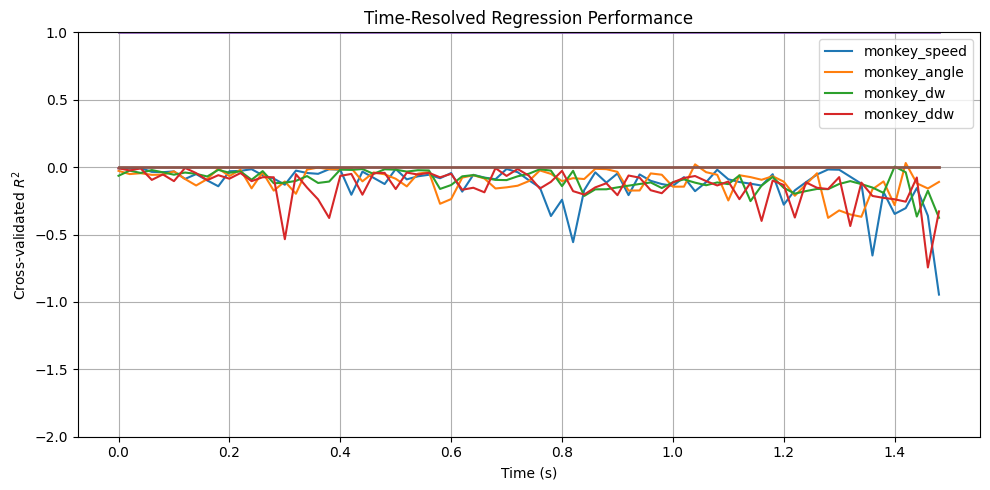

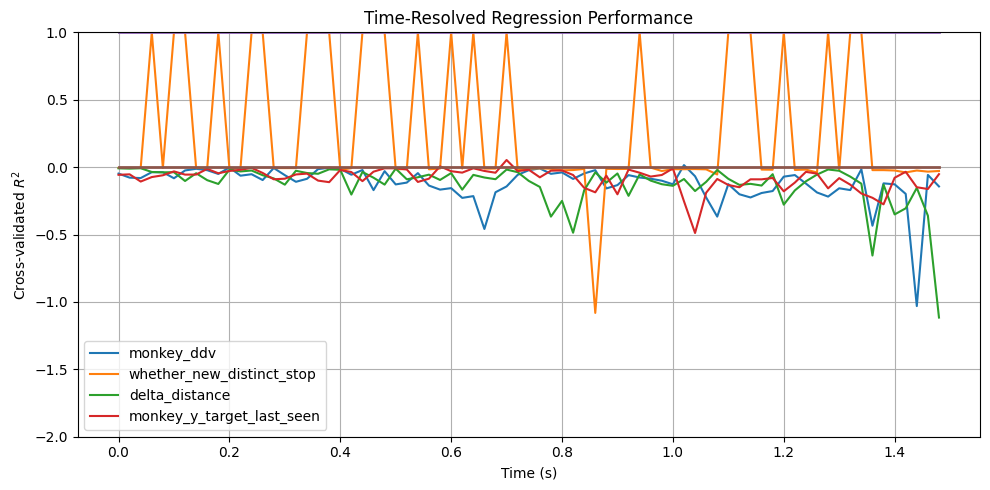

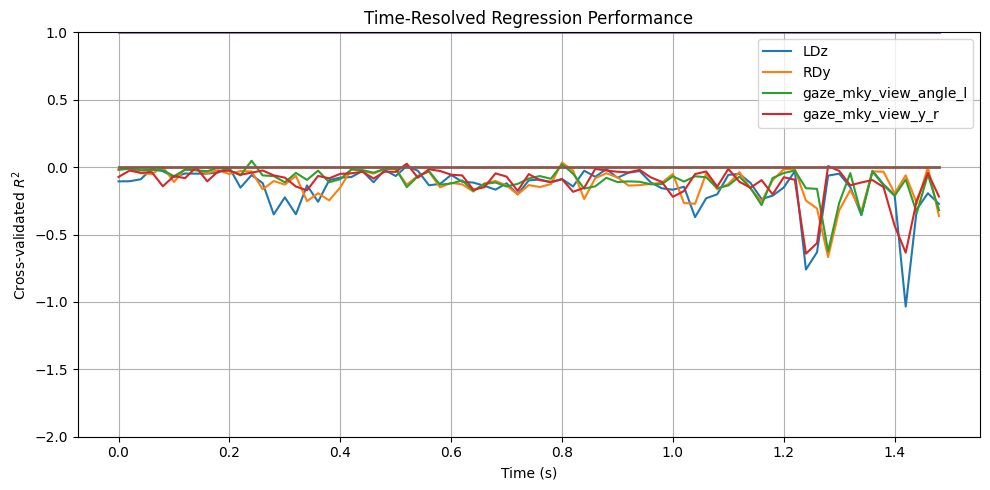

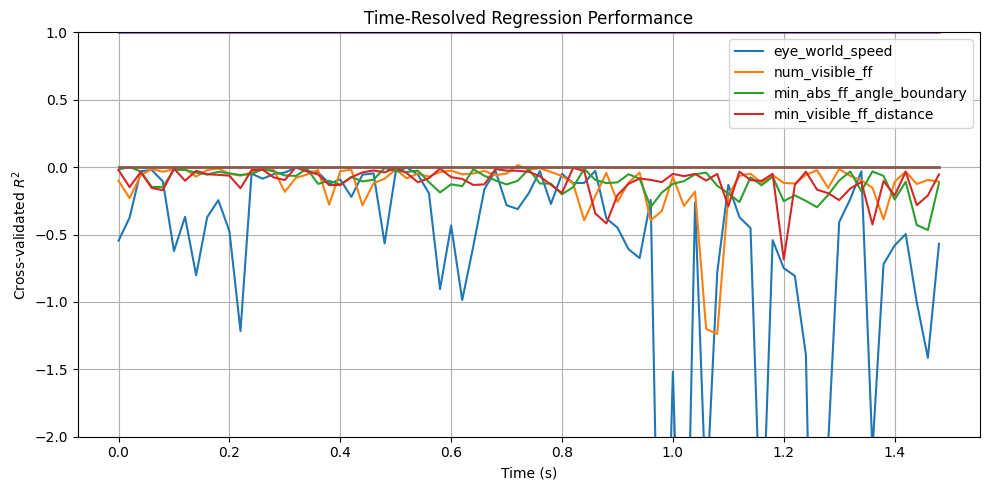

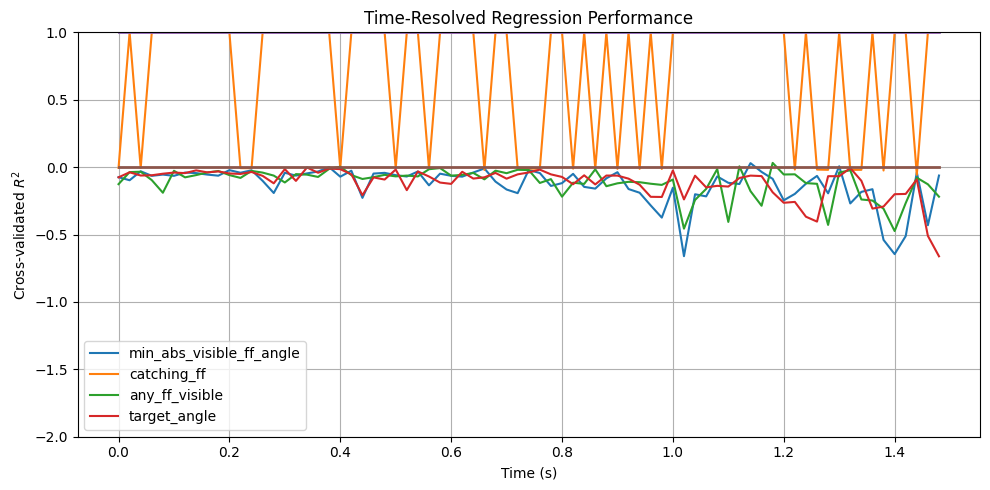

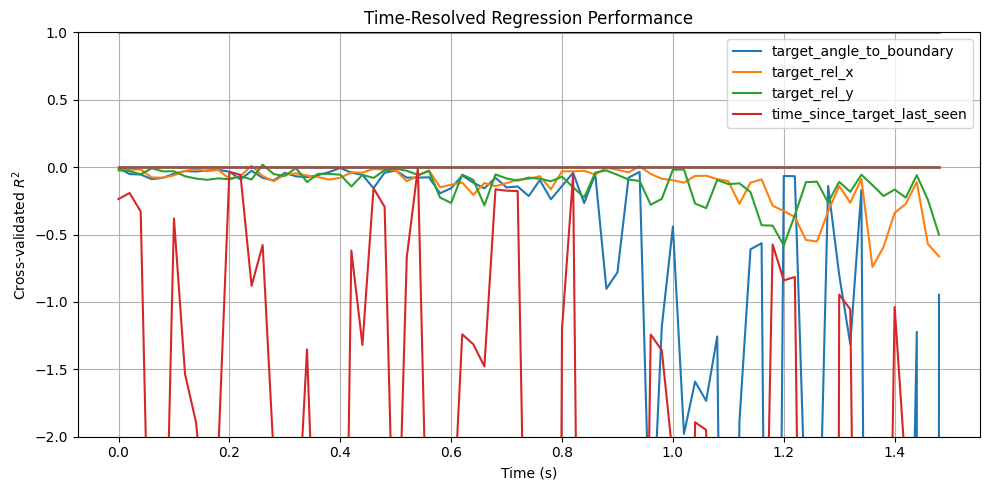

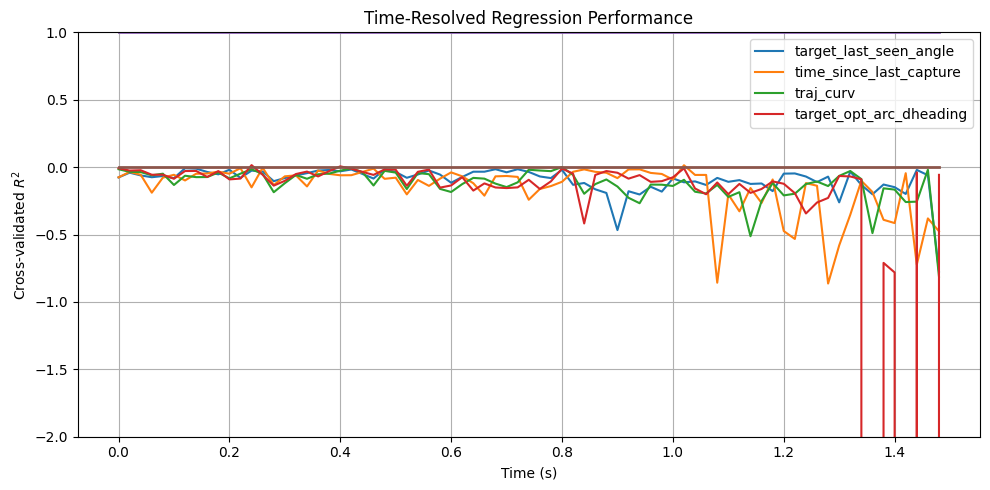

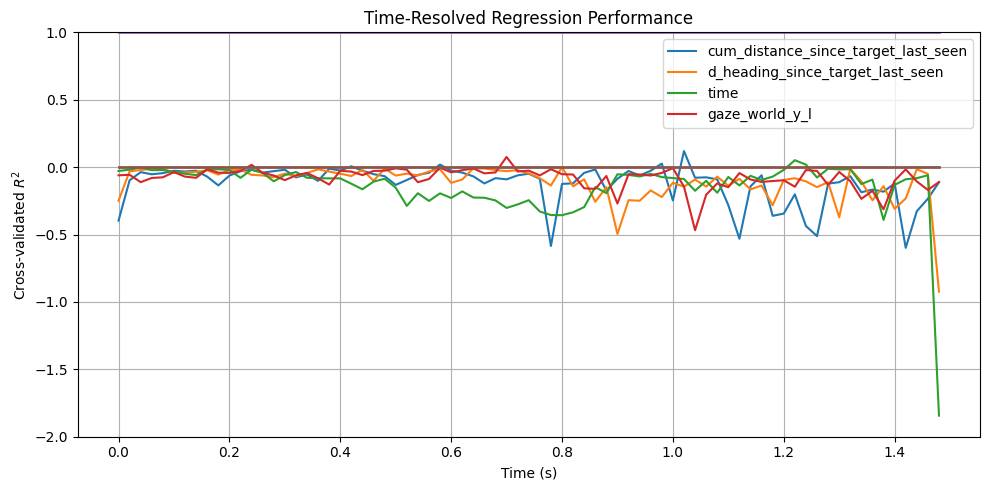

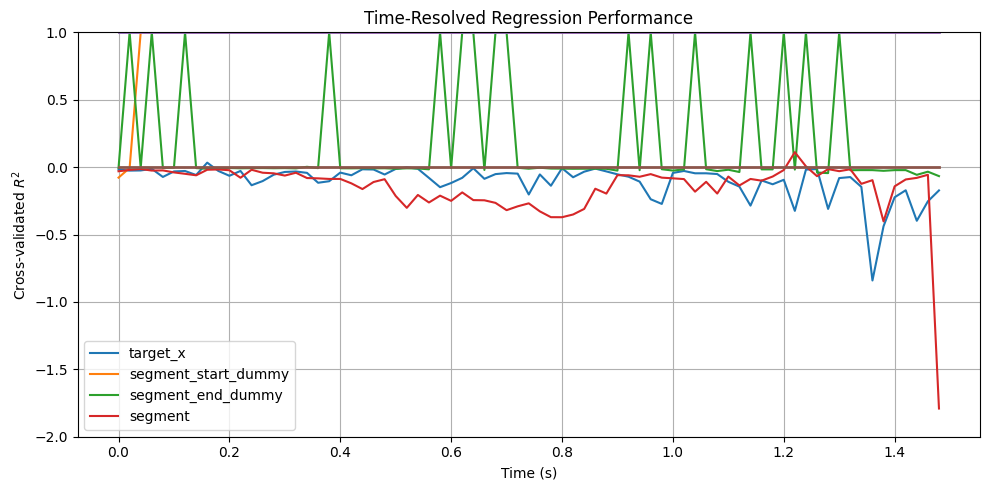

In [8]:
scores_by_time_df = pd.DataFrame(scores_by_time, columns=dec.gpfa_behav_data_columns) 
gpfa_regression_utils.plot_time_resolved_scores(scores_by_time, times, behavior_labels=scores_by_time_df.columns)


In [ ]:
max_timepoints = int(1.5/0.02)
scores_by_time, times = gpfa_regression_utils.run_time_resolved_regression_variable_length_trials(dec.gpfa_neural_trials, dec.behav_trials, time_step=0.02, cv_folds=5, max_timepoints=max_timepoints,
                                                                                                  align_at_beginning=dec.align_at_beginning)

In [44]:
scores_by_time_df = pd.DataFrame(scores_by_time, columns=dec.gpfa_behav_data_columns)

# check one dummy variable
if 'whether_new_distinct_stop' in dec.gpfa_behav_data_columns:
    # see the percentage of 1 of this dummy variable
    dec.gpfa_behav_data[['whether_new_distinct_stop']].sum()/len(dec.gpfa_behav_data)

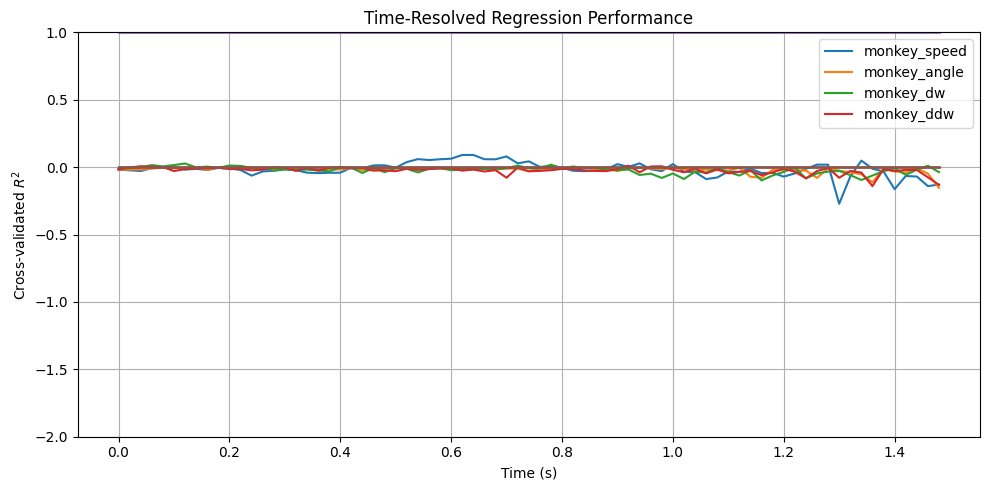

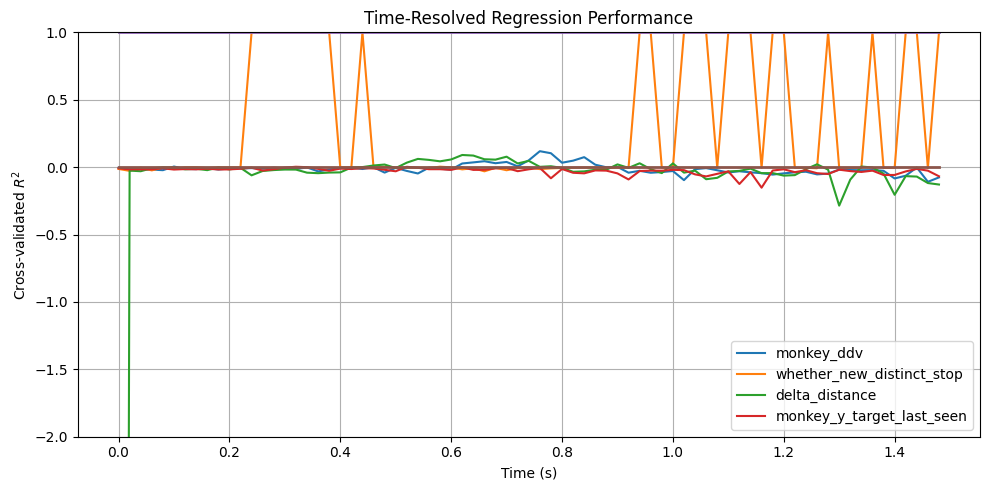

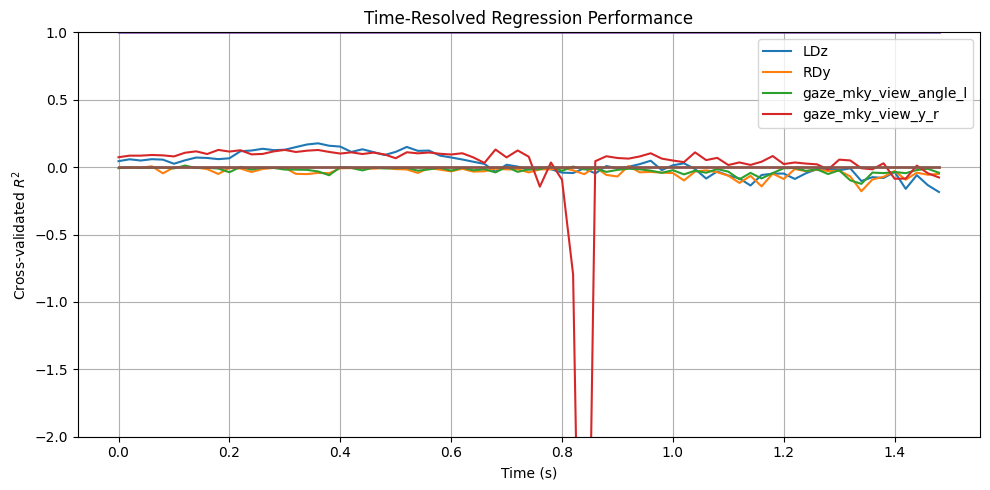

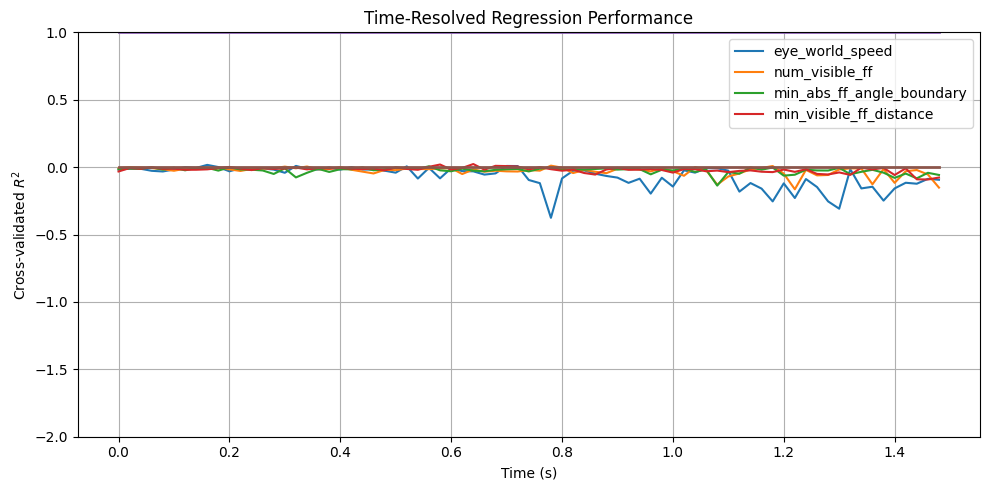

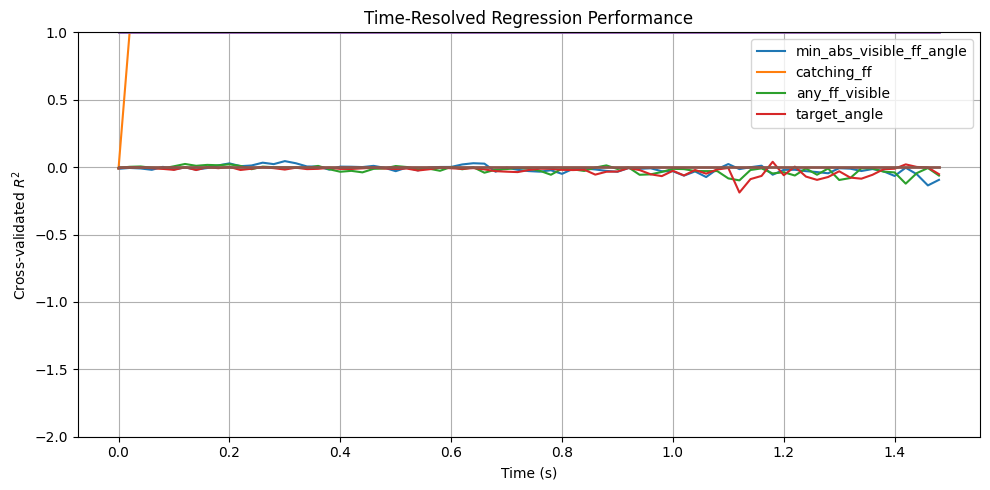

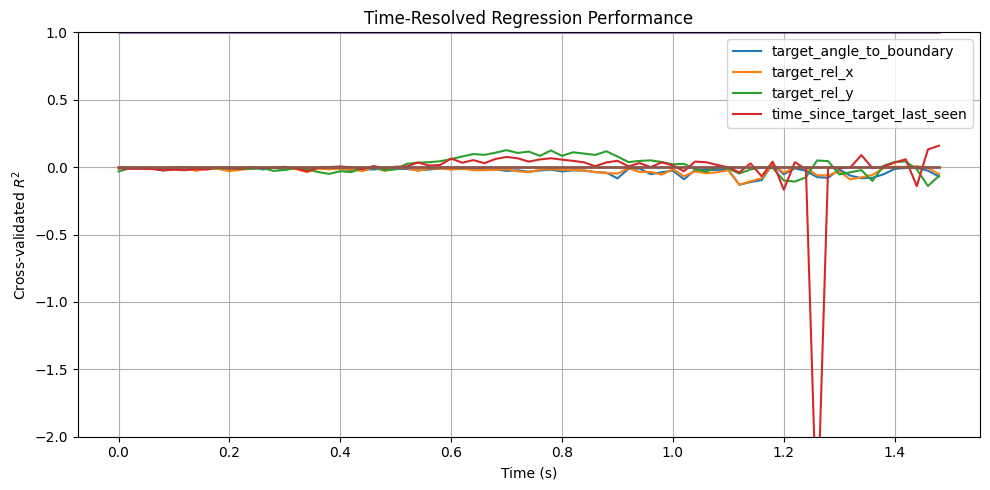

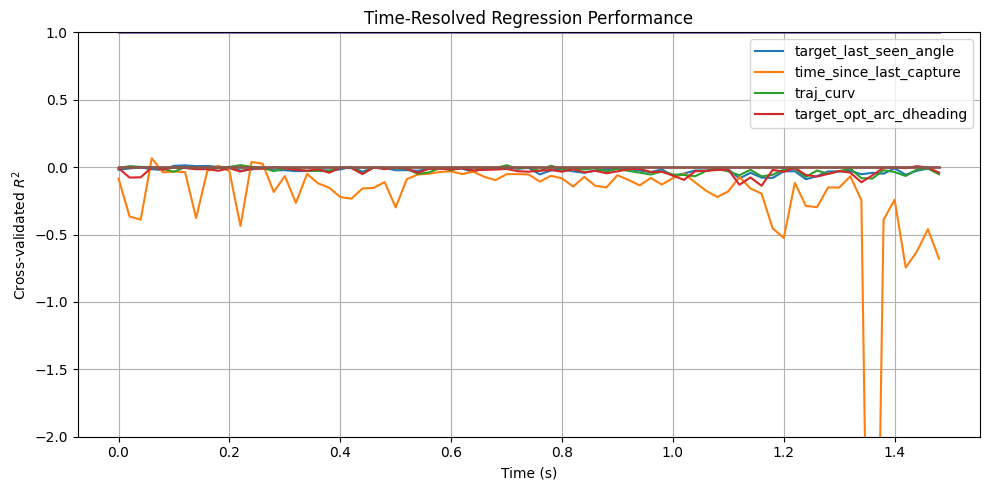

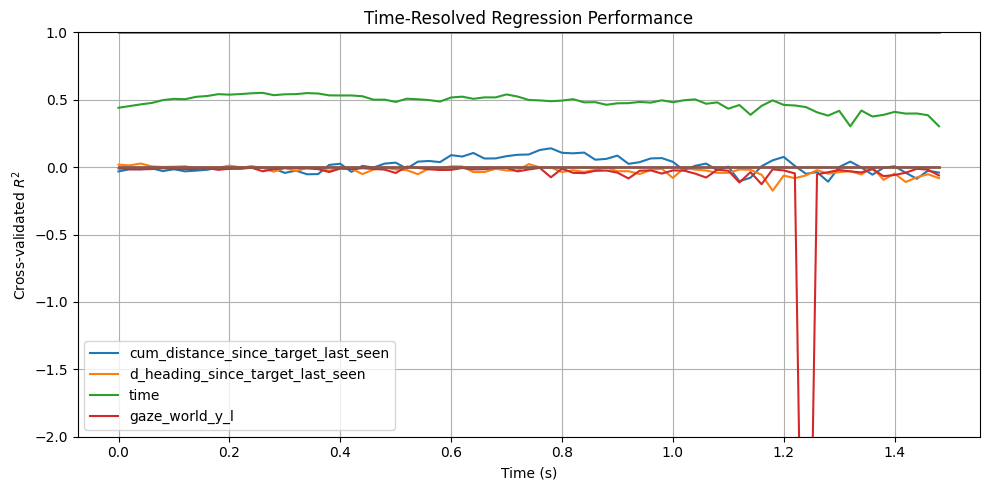

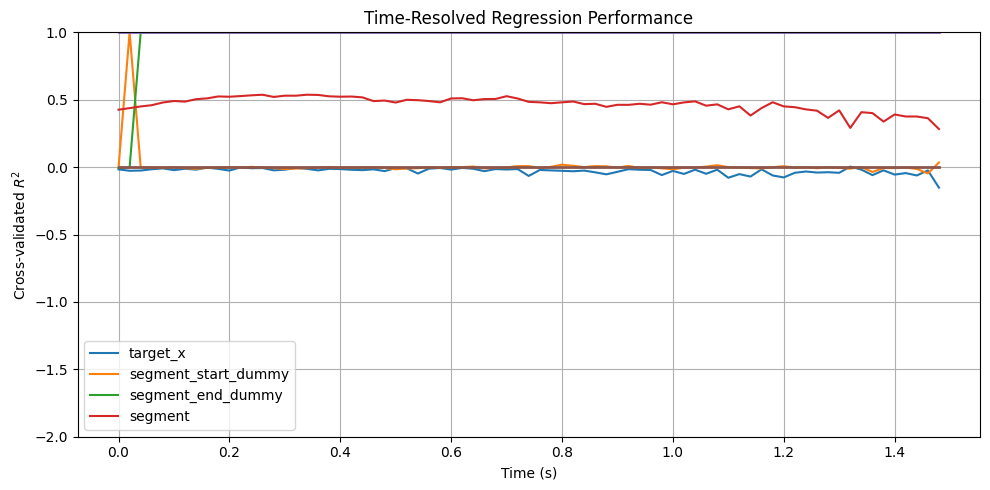

In [45]:
gpfa_regression_utils.plot_time_resolved_scores(scores_by_time, times, behavior_labels=scores_by_time_df.columns)


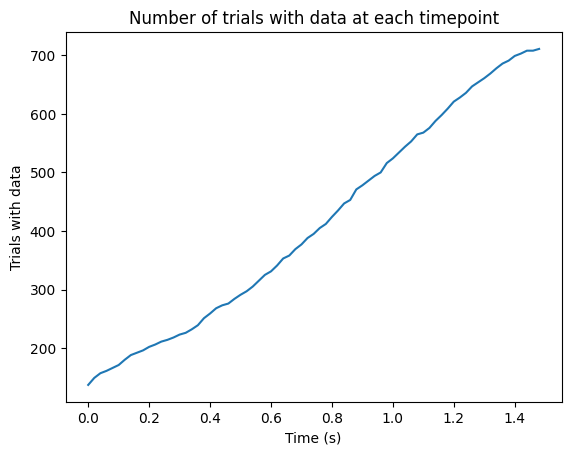

In [57]:
gpfa_regression_utils.plot_trial_counts_by_timepoint(dec.gpfa_neural_trials, times, align_at_beginning=dec.align_at_beginning)  # 

# try ML

In [ ]:
max_timepoints = int(1.5/0.02)
scores_by_time, times = gpfa_regression_utils.run_time_resolved_regression_variable_length_trials(dec.gpfa_neural_trials, dec.behav_trials, time_step=0.02, cv_folds=5, max_timepoints=max_timepoints,
                                                                                                  align_at_beginning=dec.align_at_beginning)

In [ ]:
scores_by_time_df = pd.DataFrame(scores_by_time, columns=dec.gpfa_behav_data_columns)

# check one dummy variable
if 'whether_new_distinct_stop' in dec.gpfa_behav_data_columns:
    # see the percentage of 1 of this dummy variable
    dec.gpfa_behav_data[['whether_new_distinct_stop']].sum()/len(dec.gpfa_behav_data)

In [ ]:
# General usage for any behavioral variable
decoder = ml_decoder_class.MLBehavioralDecoder()

# Decode target variables
results = decoder.decode_variable(neural_data, behavioral_data, 'target_distance')

# Decode movement variables  
results = decoder.decode_variable(neural_data, behavioral_data, 'velocity_x')

# Decode eye position
results = decoder.decode_variable(neural_data, behavioral_data, 'eye_position_x')

# Decode any other behavioral variable
results = decoder.decode_variable(neural_data, behavioral_data, 'attention_level')

# Get best model for any variable
best_model, best_results = decoder.get_best_model('velocity_x', 'test_r2')

# Make predictions for any variable
predictions = decoder.predict_new_data(new_neural_data, 'eye_position_y')

# Plot results for any variable
decoder.plot_ml_results('target_angle', 'rf')

In [ ]:
# This still works exactly as before
decoder = ml_decoder_class.MLBehavioralDecoder()
results = decoder.decode_targets(neural_data, target_data, 'target_distance')

# behav features

In [ ]:
# find set difference between dec.behav_data_all.columns and dec.behav_data.columns
diff_columns = set(dec.behav_data_all.columns) - set(dec.behav_data.columns)

## check result of reducing

In [ ]:
## also check correlations between x vars without lags
high_corr_pair_df, top_n_corr_df = drop_high_corr_vars.get_pairs_of_columns_w_high_corr(
            dec.x_var, corr_threshold=0.8)
top_n_corr_df

# Linear regression (didn't modify yet)
Regressing the behavioral variables individually (as y_var) against all neural activity

## put results in df

In [ ]:
# dec.make_or_retrieve_y_var_lr_resault_df(exists_ok=True)
dec.y_var_lr_result_df = neural_data_modeling.get_y_var_lr_result_df(
                dec.x_var_lags_reduced, dec.y_var)
dec.y_var_lr_result_df.head(5)

##  plot all neural clusters vs one behavioral var

In [ ]:
# drop existing columns involving bin (most likely there's only one or zero after being reduced, because different lags of bins can have very high correlations)
bin_cols = [col for col in dec.y_var_lags_reduced.columns if 'bin' in col]
dec.y_var_lags_reduced.drop(columns=bin_cols, inplace=True)

# then we add the variable bin (so that only the 0 lag is used)
dec.y_var_lags_reduced['bin'] = dec.y_var_lags['bin_0'].astype(int)

In [ ]:


# conduct linear regression on X and y
plt.rcParams["figure.figsize"] = (20, 10)
bins_to_plot = dec.y_var_lags_reduced['bin'].values
for i, column in enumerate(dec.y_var_lags_reduced.columns):

    plot_neural_data.plot_regression(dec.y_var_lags_reduced, column, dec.x_var_lags_reduced, bins_to_plot=bins_to_plot, min_r_squared_to_plot=0.3)
    # if i == 3:
    #     break

##  plot one neural cluster vs one behavioral var

In [ ]:
# plot one neural cluster against one behavioral variable
cluster_num, behavioral_column = 6, 'monkey_speed'
bins_to_plot = range(1000, 1200)
x_values = dec.binned_spikes_df.loc[bins_to_plot, f'unit_{cluster_num}'].values
y_values = dec.pursuit_data[behavioral_column][bins_to_plot]
reg = LinearRegression().fit(x_values.reshape(-1, 1), y_values)

plt.scatter(x_values, y_values, color='blue', s=1)
plt.plot(x_values, reg.predict(x_values.reshape(-1, 1)), color='red', linewidth=1)
plt.show()

# PGAM (unfinished)

In [ ]:
## Categorize variables
dec.y_var_reduced.columns
temporal_vars = ['time_rel_to_stop',
 'time_when_nxt_ff_first_seen_rel_to_stop',
 'time_when_cur_ff_first_seen_rel_to_stop',
 'time_when_nxt_ff_last_seen_rel_to_stop',
 'time_when_cur_ff_last_seen_rel_to_stop',
 ]

spatial_vars = [x for x in dec.y_var_reduced.columns if x not in temporal_vars]
spatial_vars

# Inspect data

## sparsity of neural data

In [ ]:
dec.binned_spikes_df.shape

In [ ]:
# inspect neural data

bins = dec.binned_spikes_df

# Calculate percentage of non-zero rows for each column
non_zero_percentages = (bins != 0).mean() * 100

# Create a DataFrame with the results
non_zero_df = pd.DataFrame({
    'Column': non_zero_percentages.index,
    'Percent_Non_Zero': non_zero_percentages.values
})

# Sort by percentage in descending order
non_zero_df = non_zero_df.sort_values('Percent_Non_Zero', ascending=False)

print("Percentage of non-zero values in each column:")
print(non_zero_df)


In [ ]:
bins.drop(columns='bin').mean(axis=1).describe()

# plot the percentile of values of mean firing rates across neurons at each time bin
mean_rates = bins.drop(columns='bin').mean(axis=1)

# Calculate percentiles from 0 to 100
percentiles = np.arange(0, 101, 1)
percentile_values = np.percentile(mean_rates, percentiles)

# Create plot
plt.figure(figsize=(6, 4))
plt.plot(percentiles, percentile_values)
plt.xlabel('Percentile')
plt.ylabel('Mean Firing Rate')
plt.title('Distribution of Mean Firing Rates Across Neurons')
plt.grid(True)
plt.show()


## multicollinearity

### y var (behavioral)

In [ ]:
y_var_vif = drop_high_vif_vars.get_vif_df(dec.y_var)
print(y_var_vif.head(8))

# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif_df[vif_df['vif'] > 5].feature.values
specific_columns = y_var_vif.feature.values[:10]
corr_coeff = dec.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (8, 6))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

In [ ]:
# Try y_var_reduced

y_var_vif = drop_high_vif_vars.get_vif_df(dec.y_var_reduced)
print(y_var_vif.head(8))

# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif_df[vif_df['vif'] > 5].feature.values
specific_columns = y_var_vif.feature.values[:10]
corr_coeff = dec.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (8, 6))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

## plot trial segments in pursuit_data

In [ ]:
from visualization.matplotlib_tools import plot_trials,
dec.make_PlotTrials_args()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]                     

max_plot_to_make = 2
plot_counter = 0

for index, row in dec.single_vis_target_df.iloc[2:].iterrows():

    duration = [row['last_vis_time'], row['ff_caught_time']]

    returned_info = plot_trials.PlotTrials(
                duration, 
                *dec.PlotTrials_args,  
                adjust_xy_limits=True,       
                minimal_margin=50,
                show_reward_boundary=True,
                show_alive_fireflies=False,
                show_visible_fireflies=True,
                show_in_memory_fireflies=True,
                show_believed_target_positions=True,
                )
    plt.show()
    

    plot_counter += 1
    if plot_counter >= max_plot_to_make:
        break

### check target_rel_x and y
(The look correct after checking)

In [ ]:
pursuit_sub = dec.pursuit_data.loc[dec.pursuit_data['target_index']==65].copy()
pursuit_sub['target_angle_deg'] = pursuit_sub['target_angle'] * 180/pi 

In [ ]:
pursuit_sub[['point_index', 'target_angle_deg', 'target_distance', 'target_rel_x', 'target_rel_y']]

# Reducing columns in lags: experiment

## check for contributions

In [ ]:
df = dec.y_var_lags_reduced.copy()
# for target_feature in vif_df[vif_df['vif'] > 5].feature.values:
for index, row in vif_df.iterrows():
    target_feature = row.feature
    print(f'\n\n {target_feature}: VIF = {row.vif}')
    contributions = drop_high_vif_vars.check_vif_contribution(df, target_feature)

## check subset's vif

### use y_var_lags

In [ ]:
columns = [col for col in dec.y_var_lags.columns if ('LD' in col) or (
                'RD' in col) or ('gaze_mky_view_angle' in col)]

df_sub = dec.y_var_lags[columns].copy()
print(df_sub.columns)
sub_vif = drop_high_vif_vars.get_vif_df(df_sub)
sub_vif

### use y_var_lags_reduced

In [ ]:
# columns = [col for col in dec.y_var_lags_reduced.columns if ('LD' in col) or (
#                 'RD' in col) or ('gaze_mky_view_angle' in col)]

columns = [col for col in dec.y_var_lags_reduced.columns if ('x_r' in col) or ('y_r' in col)]

df_sub = dec.y_var_lags_reduced[columns].copy()
print(df_sub.columns)
sub_vif = drop_high_vif_vars.get_vif_df(df_sub)
sub_vif

## exp on subsets to reduce

In [ ]:
dec.reduce_y_var_lags(filter_vif_by_feature=False)

In [ ]:
subset_key_words, all_column_subsets = dec.get_subset_key_words_and_all_column_subsets_for_vif(
            dec.y_var_lags_reduced)
subset_key_words

# Appendix

## check NA

In [ ]:
na_rows, na_cols = general_utils.find_rows_with_na(dec.y_var)
duplicate_rows = general_utils.find_duplicate_rows(dec.y_var, column_subset=None)

# test speed of code

In [ ]:
# Run profiler and save output to file
cProfile.run('dec.streamline_making_behav_and_neural_data()', 'profile_output')

# Load stats and sort by total time
p = pstats.Stats('profile_output')
p.strip_dirs().sort_stats('tottime').print_stats(10)

In [ ]:
p.strip_dirs().sort_stats('tottime').print_stats()

## See sizes of biggest variables

### in dec

In [ ]:
from pympler import asizeof

sizes = []
for attr in dir(dec):
    if attr.startswith('__') and attr.endswith('__'):
        continue  # skip dunder attributes
    try:
        val = getattr(dec, attr)
        size = asizeof.asizeof(val)
        sizes.append((attr, size))
    except Exception:
        pass  # ignore any errors

# Sort and display largest attributes in MB
for name, size in sorted(sizes, key=lambda x: x[1], reverse=True):
    print(f"{name}: {size / (1024 * 1024):.2f} MB")


### global

In [ ]:
import types
import warnings
from pympler import asizeof

warnings.filterwarnings("ignore", category=UserWarning)


filtered = {
    k: v for k, v in globals().items()
    if not isinstance(v, types.ModuleType)
}

sizes = []
for name, val in filtered.items():
    try:
        sizes.append((name, asizeof.asizeof(val)))
    except:
        pass

for name, size in sorted(sizes, key=lambda x: x[1], reverse=True)[:20]:
    print(f"{name}: {size / (1024 * 1024):.2f} MB")


## more columns (possibly get in the future)

get also get: (but to be honest, it doesn't make that much sense to get them....so let's skip for now.)
'distance traversed since target last visible',
'd angle since target last visible', 'target_at_right',
'time_till_capture', 'time from last visible to capture

Note that there might be multicollinearity. For example, duration from last visible to capture = time since target last visible + time till capture

Similarly, target angle = target angle last seen frozen - d angle since target last visible

(For distance it's not exactly the same because of the difference between distance and distance traversed, but it's still similar)

The multicollinearity is fine in linear regression (when each feature here is a y var), but need to be dealt with in cca.

## other thoughts

should i actually align each section, as if they are trials???
maybe i can try both that and continuous time... both can shed light on different behavioral variables
but for aligning trials, it may require alignment or warping since trial durations vary.

btw, what does it mean stitch data?

also, what does it look like to use RNN to model it?
I thought about the paper that Noah presented on


btw.......IME

## why ratio of bin/target_index approaches constant

In [ ]:
trial_lengths = dec.pursuit_data[['target_index', 'bin']].groupby('target_index').count()
trial_lengths.describe()

In [ ]:
sub = dec.y_var_reduced[['time', 'bin', 'target_index']]
sub['factor'] = dec.y_var_reduced['bin']/dec.y_var_reduced['target_index']
sub

In [ ]:
plt.hist(np.diff(dec.ff_caught_T_sorted), bins=30)
plt.xlabel('Time difference')
plt.ylabel('Count')
plt.title('Distribution of time differences between caught events')
plt.show()


In [ ]:
dec.ff_caught_T_sorted/np.arange(len(dec.ff_caught_T_sorted))

## compared with neural_data_modeling

In [ ]:
dec = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
dec.streamline_preparing_neural_and_behavioral_data()

In [ ]:
dec.final_behavioral_data

In [ ]:
dec.y_var

In [ ]:
dec.y_var_reduced

In [ ]:
dec.y_var.columns

In [ ]:
dec.y_var_reduced.columns

In [ ]:
[col for col in dec.y_var.columns if col not in dec.y_var_reduced.columns]

In [ ]:
[col for col in dec.y_var_reduced.columns if col not in dec.y_var.columns]

## Check gpfa's binned spikes vs my own binned spikes

In [ ]:
spike_segs_df = fit_gpfa_utils.make_spike_segs_df(dec.spike_df, dec.single_vis_target_df)


### get binned spikes (seqs) from gpfa_utils.

In [ ]:
seg_index = 9
cluster_index = 12
seg = dec.spiketrain_corr_segs[seg_index]
cluster = dec.spike_segs_df.cluster.unique()[cluster_index]

spiketrain = dec.spiketrains[seg_index][cluster_index]
seqs = gpfa_util.get_seqs([spiketrain], dec.bin_width_w_unit)

### take out my own binned spikes

In [ ]:
p_sub = dec.pursuit_data_all[dec.pursuit_data_all['segment']==seg]
binned_spikes_sub = dec.binned_spikes_df[dec.binned_spikes_df['bin'].isin(p_sub['bin'])].copy()
binned_spikes_sub['bin'] = binned_spikes_sub.index
binned_spikes_sub2 = binned_spikes_sub.merge(p_sub[['bin', 'time']], on='bin', how='left')
binned_spikes_sub3 = binned_spikes_sub2[['bin', 'time', f'unit_{cluster}']].copy()

### compare

In [ ]:
trial_length = len(binned_spikes_sub3)
if dec.align_at_beginning:
    binned_spikes_sub3['gpfa'] = seqs[0][1][0][trial_length:]
else:
    binned_spikes_sub3['gpfa'] = seqs[0][1][0][-trial_length:] # when getting latent dimension for neural data, [-trial_length:] was also used
binned_spikes_sub3['same'] = binned_spikes_sub3[f'unit_{cluster}'] == binned_spikes_sub3['gpfa']
binned_spikes_sub3[binned_spikes_sub3['same']!=True]

## find out why there are rows of NA in dec.y_var

In [ ]:
na_rows, na_cols = general_utils.find_rows_with_na(dec.y_var)
duplicate_rows = general_utils.find_duplicate_rows(dec.y_var, column_subset=None)

In [ ]:
dec.behav_data_all.loc[118189:118195, ['bin', 'time', 'target_rel_x', 'target_rel_y','time_since_target_last_seen', 'target_last_seen_distance']]

## Compare old and new target df

In [ ]:
target_df_ori = pd.read_csv('/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/patterns_and_features/monkey_Schro/data_0416/target_df_ori.csv')
df = target_df_ori[['target_index', 'point_index', 'time']].copy()
for col in ['target_distance', 'time_since_target_last_seen']:
    df[f'old_{col}'] = target_df_ori[col]   
    df[f'new_{col}'] = dec.target_df[col]  

df['old_target_last_seen_distance'] = target_df_ori['target_last_seen_distance_frozen']
df['new_target_last_seen_distance'] = dec.target_df['target_last_seen_distance']

df2 = df.loc[10068:]
df2

In [ ]:
df3 = df2[df2['point_index']>= 139910]
df3

In [ ]:
139913